In [8]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [10]:
image_path = 'test.jpg'
image = Image.open(image_path)

In [12]:
print(image.format, image.size, image.mode)

JPEG (710, 398) RGB


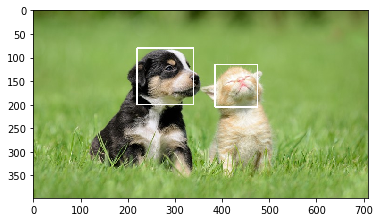

In [136]:
im = cv2.imread(image_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
box_gt = np.array([[280, 140, 120, 120],
        [430, 160, 90, 90] ])
# box_gt = [cx, cy, w, h]
color = (255, 255, 255)
rect = cvtToPos(box_gt[0])
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

rect = cvtToPos(box_gt[1])
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

plt.imshow(im)

In [123]:
# compute feature map positions
div_width = 7
div_height = 4

im_w = im.shape[1]
im_h = im.shape[0]

feat_w = int(im_w / div_width)
feat_h = int(im_h / div_height)

feat_c_x = np.array([int(feat_w / 2) + 1 + n * feat_w for n in range(div_width)])
feat_c_y = np.array([int(feat_h / 2)+ 1 + n * feat_h for n in range(div_height)])

sq_w = min(feat_w, feat_h)
feat_map = []
for j in range(div_height):
    for i in range(div_width):
        feat_map.append(np.array([feat_c_x[i], feat_c_y[j], sq_w, sq_w]))

array([51, 50, 99, 99])

In [160]:
def cvtToPos(feat_map): # feat_map = [cx, cy, w, h]
    left_upper_x = feat_map[0] - int(feat_map[2]/2)
    left_upper_y = feat_map[1] - int(feat_map[3]/2)
    right_lower_x = feat_map[0] + int(feat_map[2]/2)
    right_lower_y = feat_map[1] + int(feat_map[3]/2)
    return np.array([left_upper_x, left_upper_y, right_lower_x, right_lower_y])

def cvtEdge2Center(rect): # rect = [left_upper_x, left_upper_y, w, h]
    cx = rect[0] + int(rect[2]/2)
    cy = rect[1] + int(rect[3]/2)
    return np.array([cx, cy, rect[2], rect[3]])

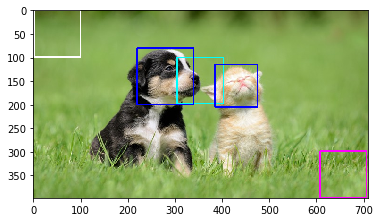

In [145]:
im = cv2.imread(image_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
box_gt = np.array([[280, 140, 120, 120],
        [430, 160, 90, 90] ])

color1 = (255, 255, 255)
rect = cvtToPos(feat_map[0])
color = color1
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

color2 = (255, 0, 255)
rect = cvtToPos(feat_map[27])
color = color2
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

color3 = (0, 255, 255)
rect = cvtToPos(feat_map[10])
color = color3
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

color3 = (0, 0, 255)
rect = cvtToPos(box_gt[0])
color = color3
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

color3 = (0, 0, 255)
rect = cvtToPos(box_gt[1])
color = color3
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

plt.imshow(im)

In [ ]:
m = 10
smin = 0.2
smax = 0.9
arr = np.array([i for i in range(m)])
sk = smin + (smax - smin) / (m - 1) * arr

In [161]:
# for feat_map[10]
feat = feat_map[9]
aspect = [1, 2, 3, 1/2, 1/3]
s = 1
sq_w = feat[2]
def_box = []
for ar in aspect:
    w = int(sq_w * s * ar **0.5)
    h = int(sq_w * s * (1/ar) ** 0.5)
    def_box.append(np.array([feat[0],
                             feat[1], 
                            w, 
                            h]))
# def_box = [cx, cy, w, h]

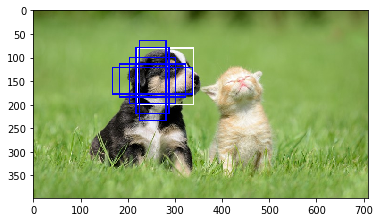

In [162]:
im = cv2.imread(image_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

color = (255, 255, 255)
rect = cvtToPos(box_gt[0])
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

color = (0, 0, 255)
for b in def_box:
    rect = cvtToPos(b)
    cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

plt.imshow(im)

In [169]:
pred_box = np.array([[250, 130, 110, 100],
        [290, 160, 100, 130] ,
                    [450, 160, 100, 100] ])


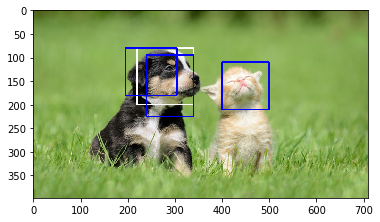

In [170]:
im = cv2.imread(image_path)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

color = (255, 255, 255)
rect = cvtToPos(box_gt[0])
cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

color = (0, 0, 255)
for b in pred_box:
    rect = cvtToPos(b)
    cv2.rectangle(im, tuple(rect[0:2]), tuple(rect[2:4]), color, thickness=2)

plt.imshow(im)

In [171]:
x = np.array([1, 1, 0])

In [187]:
def normalize(g, d):
    cx = (g[0] - d[0]) / d[2]
    cy = (g[1] - d[1]) / d[3]
    w = np.log(g[2]/d[2])
    h = np.log(g[3]/d[3])
    return np.array([cx, cy, w,h])

In [190]:
def smoothL1(l, g):
    diff = np.linalg.norm((l - g), ord=2)
    if diff > 1:
        return diff -  0.5
    else:
        return 0.5 * diff ** 2

In [194]:
norm_gt_box = []
norm_pred_box = []
for d in def_box:
    norm_gt_box.append(normalize(box_gt[0], d))
    norm_pred_box.append(normalize(pred_box[0], d)) 

In [198]:
loss = 0
for j in range(len(def_box)):
    loss += i * smoothL1(norm_gt_box[j], norm_pred_box[j])

In [199]:
loss

2.7095359892192086